# __DATA 5600: Introduction to Regression and Machine Learning for Analytics__

## __Review of Basic Concepts in Asymptotic Theory__

<br>
<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

<br>

## __The Law of Large Numbers__

***Definition***

The law which states that the larger a sample, the nearer its mean is to that of the parent population from which the sample is drawn. More formally: for every $\varepsilon > 0$, the probability

$$\{|\bar{Y} - Y| > \varepsilon \} \rightarrow 0 \quad \mbox{as} \quad n \rightarrow \infty$$

where $n$ is the sample size, $\bar{Y}$ is the sample mean, and $\mu$ is the population mean.

More rigorous definitions are the following:

For i.i.d sequences of one-dimensional random variables $Y_{1}, Y_{2}, \ldots$, let $\bar{Y}_{n} = \frac{1}{n} \sum\limits_{i=1}^{n} Y_{i}$.

The *weak law of large numbers* states that $\bar{Y}_{n}$ converges in probability to $\mu = E\{Y_{i}\}$ if $E\{|Y_{i}|\} < \infty$.

The *strong law of large numbers* states that $\bar{Y}_{n}$ converges almost surely to $\mu$ if $E\{|Y_{i}|\} < \infty$.

Both results hold under the more stringent but easily checked condition that $var\{Y_{i}\} = \sigma^{2} < \infty$.

<br>

<br>

### Using Simulation to Check the Law of Large Numbers

We can use simulation to check the Law of Large Numbers. Consider a fair die with six sides and outcomes $Y = \{1, 2, 3, 4, 5, 6\}$, each with $P[Y_{i} = y] = \frac{1}{6}$. The true mean is 

$$ \mu = E\{Y\} = \frac{1}{6}[1 + 2 + 3 + 4 + 5 + 6] = 3.5$$

We can verify this in `Python`:

In [6]:
x = np.arange(1,7)
mu = (1/6) * x.sum()
x

array([1, 2, 3, 4, 5, 6])

In [7]:
mu

3.5

<br>

Now let's simulate some rolls of the die and collect some data. We will let our sample size increase and plot the estimated mean.

We can simulate a single roll of the die as follows:


<br>

In [10]:
## roll the dice a single time and observe the outcome
np.random.randint(1, 7)

5

<br>

We can also simulate many draws at once as follows:

<br>

In [11]:
## roll the dice 100 times and observe the outcomes
np.random.randint(1, 7, size=100)

array([2, 6, 5, 3, 3, 1, 1, 6, 4, 5, 5, 1, 3, 6, 4, 1, 1, 3, 2, 4, 4, 2,
       6, 1, 5, 6, 4, 3, 2, 3, 6, 3, 2, 4, 6, 5, 6, 5, 5, 4, 5, 2, 6, 5,
       4, 1, 3, 6, 4, 1, 2, 2, 4, 3, 6, 3, 5, 3, 1, 5, 4, 3, 4, 6, 6, 5,
       2, 6, 1, 2, 4, 5, 2, 1, 5, 6, 1, 2, 5, 1, 1, 1, 5, 3, 2, 5, 2, 3,
       2, 3, 6, 2, 2, 4, 2, 3, 3, 5, 1, 1])

Text(0, 0.5, 'Estimated Mean')

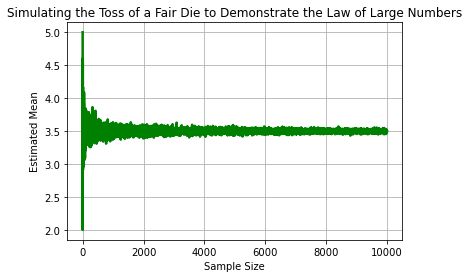

In [12]:
m = 10000
sizes = np.arange(1,m + 1)
means = np.zeros((m,))

for i in range(len(sizes)):
    y = np.random.randint(1,7, size=sizes[i])
    means[i] = y.mean()
    
plt.plot(means, 'g', lw = 2.5)
plt.grid(True)
plt.title("Simulating the Toss of a Fair Die to Demonstrate the Law of Large Numbers")
plt.xlabel("Sample Size")
plt.ylabel("Estimated Mean")

In [13]:
## peak at the first 10 estimated means
means[:10]

array([5.        , 2.        , 2.66666667, 3.        , 4.6       ,
       3.16666667, 3.14285714, 4.5       , 3.11111111, 3.5       ])

In [15]:
## peak at the last 10 estimated means
means[-10:]

array([3.48473626, 3.48208567, 3.51816271, 3.50130078, 3.49874937,
       3.50440176, 3.483345  , 3.49089818, 3.50085009, 3.4922    ])

<br>

We can do a similar simulation for the flipping of a fair coin. We can simulate the flip of a coin with the Binomial distribution as follows:

<br>

Text(0, 0.5, 'Estimated Mean')

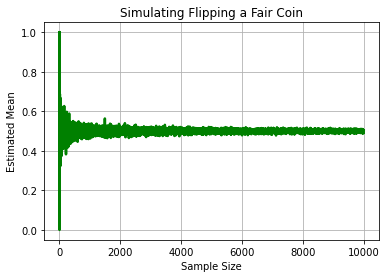

In [16]:
m = 10000
sizes = np.arange(1,m + 1)
means = np.zeros((m,))

for i in range(len(sizes)):
    y = np.random.binomial(1, 0.5, sizes[i])
    means[i] = y.mean()
    
plt.plot(means, 'g', lw = 2.5)
plt.grid(True)
plt.title("Simulating Flipping a Fair Coin")
plt.xlabel("Sample Size")
plt.ylabel("Estimated Mean")

In [17]:
## peak at the first 10 estimated means
means[:10]

array([1.        , 0.        , 0.33333333, 0.        , 1.        ,
       0.83333333, 0.42857143, 0.375     , 0.77777778, 0.7       ])

In [18]:
## peak at the last 10 estimated means
means[-10:]

array([0.50395356, 0.50110088, 0.50175123, 0.50190114, 0.50325163,
       0.48929572, 0.49024707, 0.50280056, 0.49664966, 0.5029    ])

<br>

#### Example: The Exponential Distribution

Let's do a simulation for the ___exponential distribution___ together.

<br>

See the wikipedia article for details: https://en.wikipedia.org/wiki/Exponential_distribution

<br>

In [19]:
## let's take a single draw from the exponential distribution 
np.random.exponential?

Docstring:
exponential(scale=1.0, size=None)

Draw samples from an exponential distribution.

Its probability density function is

.. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),

for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
The rate parameter is an alternative, widely used parameterization
of the exponential distribution [3]_.

The exponential distribution is a continuous analogue of the
geometric distribution.  It describes many common situations, such as
the size of raindrops measured over many rainstorms [1]_, or the time
between page requests to Wikipedia [2]_.

.. note::
    New code should use the ``exponential`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
scale : float or array_like of floats
    The scale parameter, :math:`\beta = 1/\lambda`. Must be
    non-negative.
size : int or tuple

<br>

#### Example: The Poisson Distribution

Let's do a simulation for the ___Poisson distribution___ together.

<br>

See the wikipedia article for details: https://en.wikipedia.org/wiki/Poisson_distribution

<br>

<br>

#### More Examples:

- Normal distribition
- Binomial experiment (number of heads after n tosses)

<br>